In [38]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

from warnings import filterwarnings
filterwarnings('ignore')

In [39]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [40]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [41]:
from sklearn.svm import SVR

In [42]:
svr_model = SVR(kernel="linear").fit(X_train, y_train)

In [43]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [44]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0],   svr_model.coef_[0][0]))
## hatırlatma:format ifadesi süslü parantezlere yerlestirir
"""
svr_model.intercept_[0]: BU {0} YERİNE KONUR
SVR modeli eğitildikten sonra, intercept_ modelin kesme noktası (intercept) değerini tutar.
Bu, regresyon doğrusunun y-eksenini kestiği yerdir.

svr_model.coef_[0][0]:BU {1} YERİNE KONUR
SVR'de coef_ modelin eğimini (slope) tutar, ancak bu yalnızca lineer kernel kullanıldığında mevcuttur.
Burada coef_, modelin girdilerle hedef değişken arasındaki ilişkiyi temsil eden katsayıdır.
coef_[0][0], modelin x değişkeni için eğimini almak ve bunu formülde göstermek içindir.
"""

y = -48.69756097561513 + 4.969512195122093 x


"\nsvr_model.intercept_[0]: BU {0} YERİNE KONUR\nSVR modeli eğitildikten sonra, intercept_ modelin kesme noktası (intercept) değerini tutar.\nBu, regresyon doğrusunun y-eksenini kestiği yerdir.\n\nsvr_model.coef_[0][0]:BU {1} YERİNE KONUR\nSVR'de coef_ modelin eğimini (slope) tutar, ancak bu yalnızca lineer kernel kullanıldığında mevcuttur.\nBurada coef_, modelin girdilerle hedef değişken arasındaki ilişkiyi temsil eden katsayıdır.\ncoef_[0][0], modelin x değişkeni için eğimini almak ve bunu formülde göstermek içindir.\n"

In [45]:
X_train["Hits"][0:1] ### bu bize x değerini verir

183    91.0
Name: Hits, dtype: float64

In [46]:
-48.69756097561513 + 4.969512195122093*91 ### yerine koyup denedik ilk değer için

403.5280487804953

In [47]:
###model olusturma
y_pred=svr_model.predict(X_train)

Text(0, 0.5, 'Maaş (Salary)')

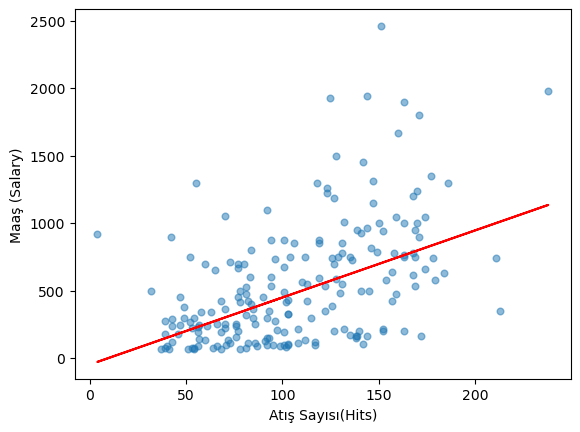

In [48]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
#plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

In [49]:
##tahmin

In [50]:
svr_model.predict([[91]]) ##x değerine hits değerini koydum

array([403.52804878])

In [51]:
y_pred = svr_model.predict(X_test)
y_pred

array([ 627.15609756,  681.82073171,  627.15609756,  428.37560976,
        155.05243902,  294.19878049,  781.21097561,  691.7597561 ,
        741.45487805,  299.16829268,  706.66829268,  612.24756098,
        169.96097561,  671.88170732,  428.37560976,  512.85731707,
        935.26585366,  314.07682927,  979.99146341,  517.82682927,
        319.04634146, 1059.50365854,  527.76585366,  567.52195122,
        945.20487805,  239.53414634,  716.60731707,  363.77195122,
        289.22926829,  179.9       ,  249.47317073,  -43.72804878,
        328.98536585,  547.64390244,  289.22926829,  403.52804878,
        686.7902439 ,  547.64390244,   85.47926829,  214.68658537,
        155.05243902,  512.85731707,  547.64390244,  497.94878049,
        632.12560976,  686.7902439 ,  209.71707317,  492.97926829,
        537.70487805,  751.39390244,  652.00365854,  229.59512195,
        860.72317073,  632.12560976,  324.01585366,  736.48536585,
        497.94878049,  299.16829268,  110.32682927,  632.12560

In [52]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [53]:
#model-tuning

In [54]:
print(svr_model.get_params())

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [55]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [56]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [58]:
svr_tuned = SVR(kernel="linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)



In [59]:
y_pred = svr_tuned.predict(X_test)

In [60]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116